In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import csv

# plt.figure(figsize=(20,15))
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [118]:
train_df=pd.read_csv("parsed_train.csv")
train_df

,artistName,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,A,B,C,AnB,AnC,BnC,AnBnC
0,Erik Satie,Uspud Act I (Version for Piano): No. 22 —,0.6510,0.00447,7,-29.930,0,0.5950,0.99400,0.98400,0.0846,0.0000,140.311,24853.0,3,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0
1,Erik Satie,Uspud Act III (Version for Piano): No. 51 Il s...,0.4020,0.00215,6,-27.476,0,0.1110,0.99400,0.91300,0.0923,0.0000,166.699,29893.0,3,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0
2,Raining Jane,Prelude,0.2800,0.11500,0,-37.846,0,0.0339,0.54900,0.44400,0.0962,0.0309,67.349,30200.0,4,WE,0,0,1.0,0.0,0,0.0,0
3,Erik Satie,Uspud Act III (Version for Piano): No. 42 Quan...,0.6370,0.07340,2,-14.896,1,0.3200,0.96500,0.77900,0.0845,0.0000,72.226,30893.0,5,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0
4,Citizen,Sleep,0.5790,0.90300,1,-10.570,1,0.1100,0.00191,0.00687,0.1340,0.8920,146.990,31905.0,4,Mystery Sounds,0,0,1.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12981,Haken,Crystallised,0.4580,0.82000,9,-6.663,1,0.0479,0.00207,0.04580,0.1020,0.4570,178.006,1162290.0,4,Restoration EP,0,0,1.0,0.0,0,0.0,0
12982,Damien Rice,Sleep Don't Weep,0.2230,0.00110,7,-32.779,0,0.0548,0.92000,0.55300,0.0959,0.0222,135.295,1314493.0,5,9,0,0,1.0,0.0,0,0.0,0
12983,Billy Strayhorn,What is Jazz - Part One (Types of Jazz),0.6160,0.20900,7,-16.566,1,0.9020,0.96600,0.00000,0.1270,0.3460,76.418,1415707.0,4,What is Jazz,1,0,0.0,0.0,0,0.0,0
12984,The Bible,Genesis - Chapters 1-7,0.7010,0.23200,8,-21.614,0,0.9250,0.90100,0.00000,0.3780,0.5470,136.139,1633876.0,5,Old Testament - Genesis - Audiobook,0,0,1.0,0.0,0,0.0,0


In [44]:
train_df.columns

Index(['artistName', 'trackName', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'albumName', 'A',
       'B', 'C', 'AnB', 'AnC', 'BnC', 'AnBnC'],
      dtype='object')

In [45]:
train_df['A'].unique()

array([0, 1], dtype=int64)

In [119]:
#### Can do word:counts 
train_dfA=train_df.loc[train_df['A']==(1),:]

In [120]:
train_dfB=train_df.loc[train_df['B']==(1),:]

In [121]:
train_dfC=train_df.loc[train_df['C']==(1.0),:]

In [56]:
train_dfA

,artistName,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,A,B,C,AnB,AnC,BnC,AnBnC
37,The Young'uns,Paella,0.746,0.3160,2,-11.964,1,0.6640,0.9540,0.000,0.1490,0.8700,109.718,55800.0,3,The Ballad of Johnny Longstaff,1,0,0.0,0.0,0,0.0,0
43,Milky Chance,Fallen,0.624,0.6600,2,-12.779,1,0.0569,0.7970,0.786,0.1140,0.8710,110.021,57818.0,3,UNDERTALE Soundtrack,1,0,0.0,0.0,0,0.0,0
52,THE KOXX,531,0.765,0.6550,9,-5.758,0,0.0478,0.0371,0.552,0.0745,0.9580,160.030,60547.0,4,ENTER,1,0,0.0,0.0,0,0.0,0
59,Carl Philipp Emanuel Bach,Solfeggio in C Minor,0.265,0.1460,5,-24.717,0,0.0432,0.9880,0.920,0.1240,0.6130,77.239,62307.0,4,Micromania - 85 Piano Miniatures,1,0,0.0,0.0,0,0.0,0
68,Count Bass D,Quite Buttery (Feat. MF Doom),0.444,0.7600,9,-4.796,0,0.1300,0.4580,0.000,0.2650,0.6620,94.403,67013.0,4,Dwight Spitz,1,0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12966,Scarecrow,The Well,0.235,0.0975,9,-25.217,0,0.0345,0.9460,0.828,0.1070,0.0361,145.033,684627.0,3,Epic Soundtracks - Hans Zimmer,1,0,0.0,0.0,0,0.0,0
12968,Thelonious Monk,Straight No Chaser,0.465,0.3500,3,-12.977,1,0.0403,0.4100,0.279,0.1350,0.6200,93.336,688133.0,4,Straight No Chaser,1,0,0.0,0.0,0,0.0,0
12974,Wilco,One Sunday Morning (Song For Jane Smiley's Boy...,0.455,0.3470,10,-15.242,1,0.0289,0.6160,0.882,0.0886,0.2560,101.163,723960.0,4,The Whole Love (Deluxe Edition),1,0,0.0,0.0,0,0.0,0
12977,William Onyeabor,When the Going is Smooth & Good,0.824,0.6230,3,-6.167,1,0.0485,0.3340,0.309,0.1010,0.5190,128.162,772098.0,4,World Psychedelic Classics 5: Who Is (Deluxe E...,1,0,0.0,0.0,0,0.0,0


In [87]:
train_df.loc[9289,:]

artistName               Michael Kiwanuka
trackName           Beautiful Life - Edit
danceability                        0.482
energy                              0.449
key                                     9
loudness                           -8.418
mode                                    0
speechiness                        0.0335
acousticness                        0.715
instrumentalness                   0.0134
liveness                            0.124
valence                             0.132
tempo                             132.379
duration_ms                      242760.0
time_signature                          4
albumName                  Beautiful Life
A                                       1
B                                       0
C                                     1.0
AnB                                   0.0
AnC                                     1
BnC                                   0.0
AnBnC                                   0
Name: 9289, dtype: object

In [69]:
def venn(row):
    if row["AnBnC"]==1:
        row["A"] = 0
        row["B"] = 0
        row["C"] = 0
        row["AnB"] = 0
        row["AnC"] = 0
        row["BnC"] = 0
    elif row["AnB"]==1:
        row["A"] = 0
        row["B"] = 0
    elif row["AnC"]==1:
        row["A"] = 0
        row["C"] = 0
    elif row["BnC"]==1:
        row["B"] = 0
        row["C"] = 0
    return row

In [88]:
venn(train_df.loc[9289,:])

C:\Users\Debraj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


artistName               Michael Kiwanuka
trackName           Beautiful Life - Edit
danceability                        0.482
energy                              0.449
key                                     9
loudness                           -8.418
mode                                    0
speechiness                        0.0335
acousticness                        0.715
instrumentalness                   0.0134
liveness                            0.124
valence                             0.132
tempo                             132.379
duration_ms                      242760.0
time_signature                          4
albumName                  Beautiful Life
A                                       0
B                                       0
C                                       0
AnB                                   0.0
AnC                                     1
BnC                                   0.0
AnBnC                                   0
Name: 9289, dtype: object

In [90]:
changed_labels_train_df=pd.DataFrame(columns=train_df.columns)

In [81]:
changed_labels_train_df=changed_labels_train_df.append(venn(train_df.loc[1000,:]))

In [91]:
for i in range(train_df.shape[0]):
    new_row=venn(train_df.loc[i,:])
    changed_labels_train_df=changed_labels_train_df.append(new_row)

In [97]:
# changed_labels_train_df.to_csv('changed_labels_train_df.csv',encoding='utf-8',index=False)

In [195]:
changed_labels_train_df=pd.read_csv("changed_labels_train_df.csv")

In [196]:
changed_labels_train_df.head()

,artistName,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,A,B,C,AnB,AnC,BnC,AnBnC
0,Erik Satie,Uspud Act I (Version for Piano): No. 22 —,0.651,0.00447,7,-29.930,0,0.5950,0.99400,0.98400,0.0846,0.0000,140.311,24853.0,3,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0
1,Erik Satie,Uspud Act III (Version for Piano): No. 51 Il s...,0.402,0.00215,6,-27.476,0,0.1110,0.99400,0.91300,0.0923,0.0000,166.699,29893.0,3,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0
2,Raining Jane,Prelude,0.280,0.11500,0,-37.846,0,0.0339,0.54900,0.44400,0.0962,0.0309,67.349,30200.0,4,WE,0,0,1.0,0.0,0,0.0,0
3,Erik Satie,Uspud Act III (Version for Piano): No. 42 Quan...,0.637,0.07340,2,-14.896,1,0.3200,0.96500,0.77900,0.0845,0.0000,72.226,30893.0,5,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0
4,Citizen,Sleep,0.579,0.90300,1,-10.570,1,0.1100,0.00191,0.00687,0.1340,0.8920,146.990,31905.0,4,Mystery Sounds,0,0,1.0,0.0,0,0.0,0


### Doing sparse encoding

In [197]:
sparse_encoded_train_df=changed_labels_train_df.copy()
sparse_encoded_train_df['Labels']='A'

In [198]:
sparse_encoded_train_df.head()

,artistName,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,A,B,C,AnB,AnC,BnC,AnBnC,Labels
0,Erik Satie,Uspud Act I (Version for Piano): No. 22 —,0.651,0.00447,7,-29.930,0,0.5950,0.99400,0.98400,0.0846,0.0000,140.311,24853.0,3,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0,A
1,Erik Satie,Uspud Act III (Version for Piano): No. 51 Il s...,0.402,0.00215,6,-27.476,0,0.1110,0.99400,0.91300,0.0923,0.0000,166.699,29893.0,3,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0,A
2,Raining Jane,Prelude,0.280,0.11500,0,-37.846,0,0.0339,0.54900,0.44400,0.0962,0.0309,67.349,30200.0,4,WE,0,0,1.0,0.0,0,0.0,0,A
3,Erik Satie,Uspud Act III (Version for Piano): No. 42 Quan...,0.637,0.07340,2,-14.896,1,0.3200,0.96500,0.77900,0.0845,0.0000,72.226,30893.0,5,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0,A
4,Citizen,Sleep,0.579,0.90300,1,-10.570,1,0.1100,0.00191,0.00687,0.1340,0.8920,146.990,31905.0,4,Mystery Sounds,0,0,1.0,0.0,0,0.0,0,A


In [199]:
for i in range(sparse_encoded_train_df.shape[0]):
    sparse_encoded_train_df.loc[i,'Labels']=(changed_labels_train_df.columns[-7:][(changed_labels_train_df.loc[i,:][-7:])==1])[0]

In [274]:
sparse_encoded_train_df.head()

,artistName,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,A,B,C,AnB,AnC,BnC,AnBnC,Labels
0,Erik Satie,Uspud Act I (Version for Piano): No. 22 —,0.651,0.00447,7,-29.930,0,0.5950,0.99400,0.98400,0.0846,0.0000,140.311,24853.0,3,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0,B
1,Erik Satie,Uspud Act III (Version for Piano): No. 51 Il s...,0.402,0.00215,6,-27.476,0,0.1110,0.99400,0.91300,0.0923,0.0000,166.699,29893.0,3,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0,B
2,Raining Jane,Prelude,0.280,0.11500,0,-37.846,0,0.0339,0.54900,0.44400,0.0962,0.0309,67.349,30200.0,4,WE,0,0,1.0,0.0,0,0.0,0,C
3,Erik Satie,Uspud Act III (Version for Piano): No. 42 Quan...,0.637,0.07340,2,-14.896,1,0.3200,0.96500,0.77900,0.0845,0.0000,72.226,30893.0,5,Satie: Esoteric Works Vol. 2 – Vexations Uspud...,0,1,0.0,0.0,0,0.0,0,B
4,Citizen,Sleep,0.579,0.90300,1,-10.570,1,0.1100,0.00191,0.00687,0.1340,0.8920,146.990,31905.0,4,Mystery Sounds,0,0,1.0,0.0,0,0.0,0,C


In [275]:
sparse_encoded_train_df.to_csv("sparse_train_df.csv",encoding='utf-8',index=False)

### EDA

In [130]:
sparse_encoded_train_df.columns

Index(['artistName', 'trackName', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'albumName', 'A',
       'B', 'C', 'AnB', 'AnC', 'BnC', 'AnBnC', 'Labels'],
      dtype='object')

<AxesSubplot:xlabel='energy', ylabel='Count'>

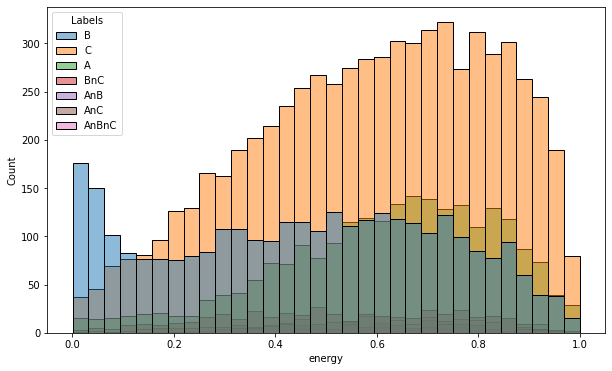

In [135]:
plt.figure(figsize=(10,6))

sns.histplot(data=sparse_encoded_train_df,x='energy',hue='Labels')

<AxesSubplot:xlabel='key', ylabel='Count'>

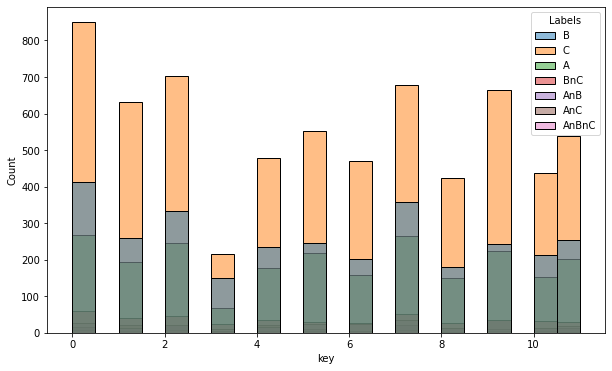

In [144]:
plt.figure(figsize=(10,6))

sns.histplot(data=sparse_encoded_train_df,x='key',hue='Labels',multiple="layer")

<AxesSubplot:xlabel='loudness', ylabel='Count'>

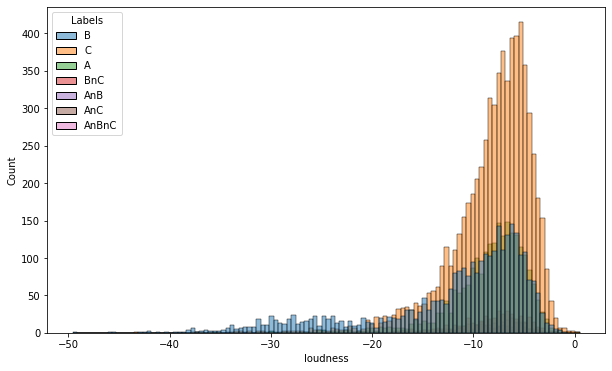

In [137]:
plt.figure(figsize=(10,6))

sns.histplot(data=sparse_encoded_train_df,x='loudness',hue='Labels')

<AxesSubplot:xlabel='mode', ylabel='Count'>

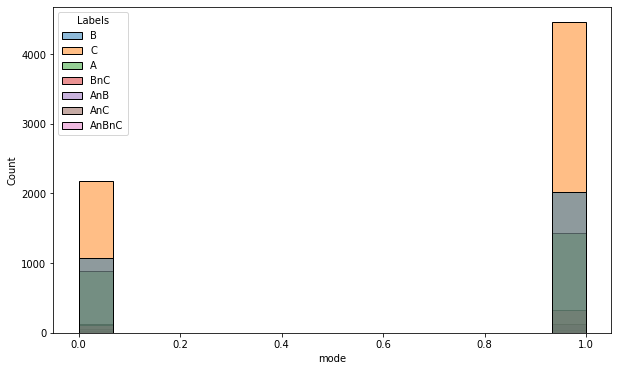

In [138]:
plt.figure(figsize=(10,6))

sns.histplot(data=sparse_encoded_train_df,x='mode',hue='Labels')

<AxesSubplot:xlabel='speechiness', ylabel='Count'>

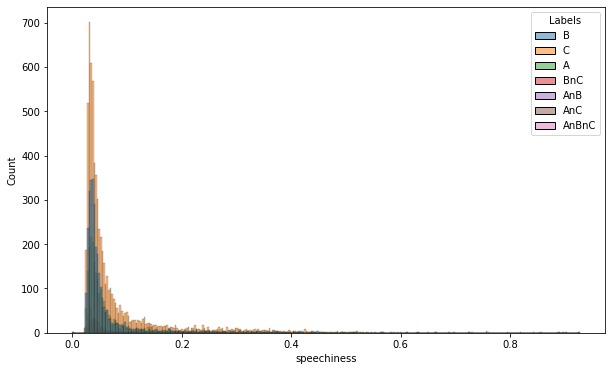

In [139]:
plt.figure(figsize=(10,6))

sns.histplot(data=sparse_encoded_train_df,x='speechiness',hue='Labels')

<AxesSubplot:xlabel='acousticness', ylabel='Count'>

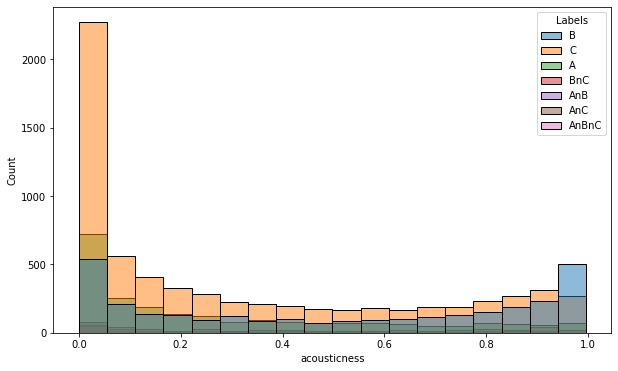

In [140]:
plt.figure(figsize=(10,6))

sns.histplot(data=sparse_encoded_train_df,x='acousticness',hue='Labels')

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

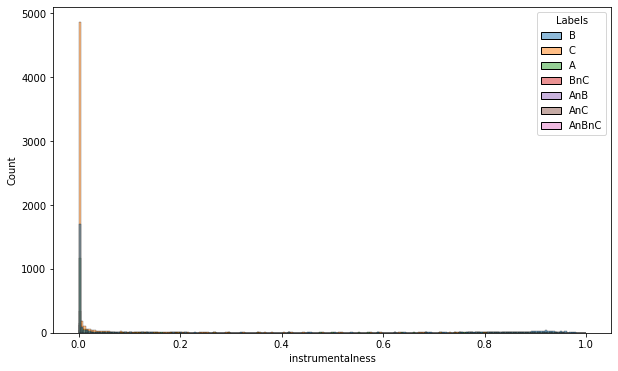

In [178]:
plt.figure(figsize=(10,6))

# sns.histplot(data=sparse_encoded_train_df,x=np.log(sparse_encoded_train_df['instrumentalness']),hue='Labels')
sns.histplot(data=sparse_encoded_train_df,x='instrumentalness',hue='Labels')

<AxesSubplot:xlabel='liveness', ylabel='Count'>

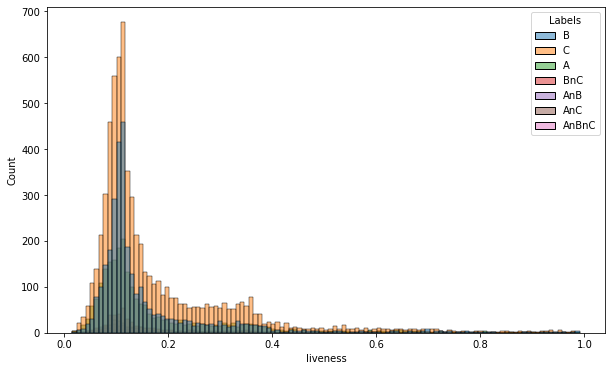

In [145]:
plt.figure(figsize=(10,6))

sns.histplot(data=sparse_encoded_train_df,x='liveness',hue='Labels')

<AxesSubplot:xlabel='valence', ylabel='Count'>

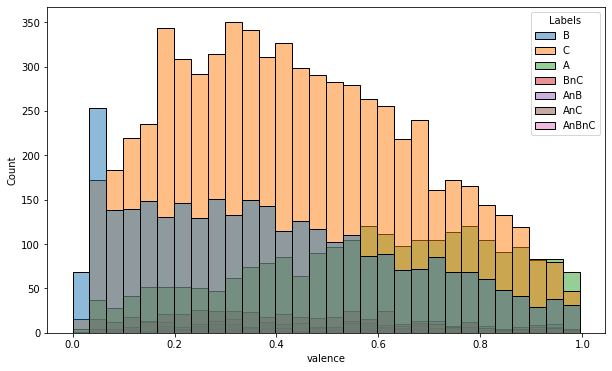

In [146]:
plt.figure(figsize=(10,6))

sns.histplot(data=sparse_encoded_train_df,x='valence',hue='Labels')

<AxesSubplot:xlabel='tempo', ylabel='Count'>

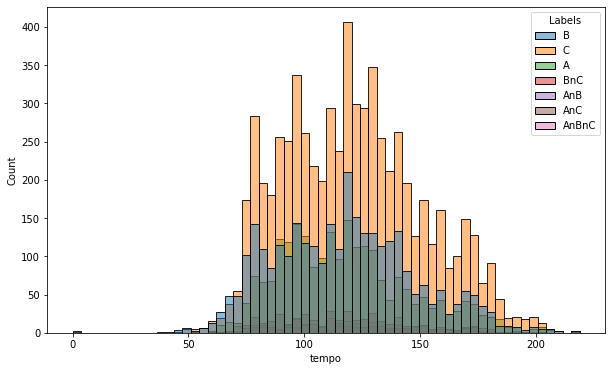

In [147]:
plt.figure(figsize=(10,6))

sns.histplot(data=sparse_encoded_train_df,x='tempo',hue='Labels')

<AxesSubplot:xlabel='duration_ms', ylabel='Count'>

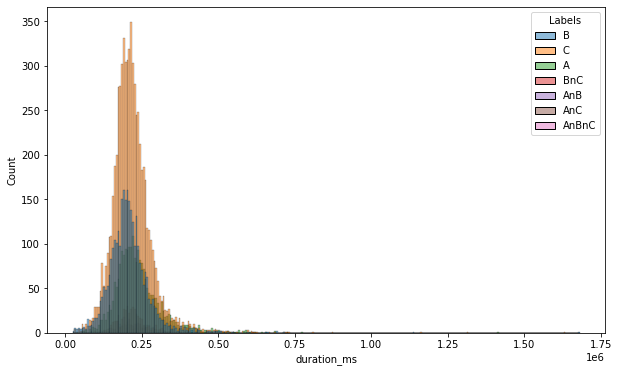

In [148]:
plt.figure(figsize=(10,6))

sns.histplot(data=sparse_encoded_train_df,x='duration_ms',hue='Labels')